In [3]:
from yt_xarray import transformations
from yt_xarray.sample_data import load_random_xr_data
import numpy as np 

fields = {
        "field0": ("radius", "latitude", "longitude"),
    }
dims = {
    "radius": (2000, 5000, 32),
    "latitude": (10, 50, 32),
    "longitude": (10, 50, 22),
}
ds = load_random_xr_data(fields, dims)
ds_yt = transformations.build_interpolated_cartesian_ds(
    ds,
    [
        "field0",
    ],
    "radius",
)
ad = ds_yt.all_data()
mn = np.nanmin(ad[("stream", "field0")])
mx = np.nanmax(ad[("stream", "field0")])
mn, mx

yt : [INFO     ] 2024-03-12 12:22:32,539 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-12 12:22:32,539 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2024-03-12 12:22:32,540 Parameters: domain_left_edge          = [826. 223. 347.]
yt : [INFO     ] 2024-03-12 12:22:32,540 Parameters: domain_right_edge         = [4850. 3773. 3831.]
yt : [INFO     ] 2024-03-12 12:22:32,541 Parameters: cosmological_simulation   = 0


(unyt_quantity(9.96838119e-05, '(dimensionless)'),
 unyt_quantity(0.99994365, '(dimensionless)'))

In [4]:
# import napari 
# from yt_napari.viewer import Scene

# v = napari.viewer.Viewer()
# yt_scene = Scene()

yt : [INFO     ] 2024-03-12 11:40:16,795 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-12 11:40:16,795 Parameters: domain_dimensions         = [250 250 250]
yt : [INFO     ] 2024-03-12 11:40:16,796 Parameters: domain_left_edge          = [-6317. -6319. -6321.]
yt : [INFO     ] 2024-03-12 11:40:16,796 Parameters: domain_right_edge         = [6320. 6319. 6321.]
yt : [INFO     ] 2024-03-12 11:40:16,797 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-03-12 11:40:18,858 xlim = -6317.000000 6320.000000
yt : [INFO     ] 2024-03-12 11:40:18,859 ylim = -6319.000000 6319.000000
yt : [INFO     ] 2024-03-12 11:40:18,861 xlim = -6317.000000 6320.000000
yt : [INFO     ] 2024-03-12 11:40:18,862 ylim = -6319.000000 6319.000000
yt : [INFO     ] 2024-03-12 11:40:18,867 Making a fixed resolution buffer of (('stream', 'mp')) 800 by 800



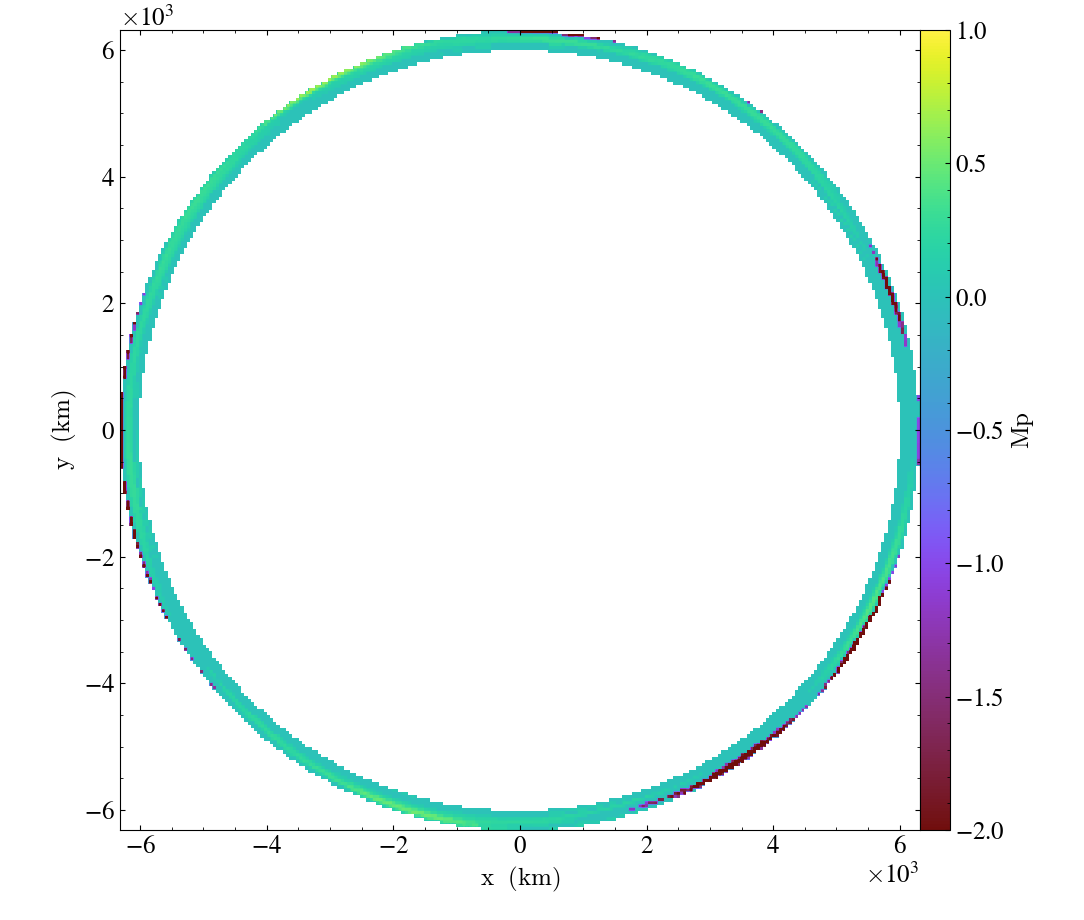

In [3]:
# globa dataset. upper mantle only, need high res to resolve ring
import yt_xarray
import yt
from yt_xarray import transformations

ds = yt_xarray.open_dataset("IRIS/DBRD-NATURE2020-depth.nc")
yt_ds = transformations.build_interpolated_cartesian_ds(ds, ('mp',), 
                                                        'depth', 
                                                        length_unit='km', 
                                                        grid_resolution=(250, 250, 250))
slc = yt.SlicePlot(yt_ds, "z", ('stream', 'mp'))
slc.set_log(('stream', 'mp'), False)
slc.set_zlim(('stream', 'mp'), -2, 1)
# slc.save('/var/tmp/what.png')

In [4]:
# yt_scene.add_region(v, yt_ds, ('stream', 'mp'), resolution=(100,100,100), take_log=False)

yt_xarray : [INFO ] 2024-03-12 11:40:28,438:  Inferred geometry type is geodetic. To override, use ds.yt.set_geometry
yt_xarray : [INFO ] 2024-03-12 11:40:28,439:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2024-03-12 11:40:28,440:      stretched grid detected: yt_xarray will interpolate.
yt : [INFO     ] 2024-03-12 11:40:28,490 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-12 11:40:28,491 Parameters: domain_dimensions         = [ 18  92 121]
yt : [INFO     ] 2024-03-12 11:40:28,491 Parameters: domain_left_edge          = [  60.     27.5  -125.75]
yt : [INFO     ] 2024-03-12 11:40:28,492 Parameters: domain_right_edge         = [885.   50.5 -95.5]
yt : [INFO     ] 2024-03-12 11:40:28,493 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-03-12 11:40:28,564 xlim = -125.750000 -95.500000
yt : [INFO     ] 2024-03-12 11:40:28,564 ylim = 27.500000 50.500000
yt : [INFO     ] 2024-03-12 11:40:28,564 Setting origin


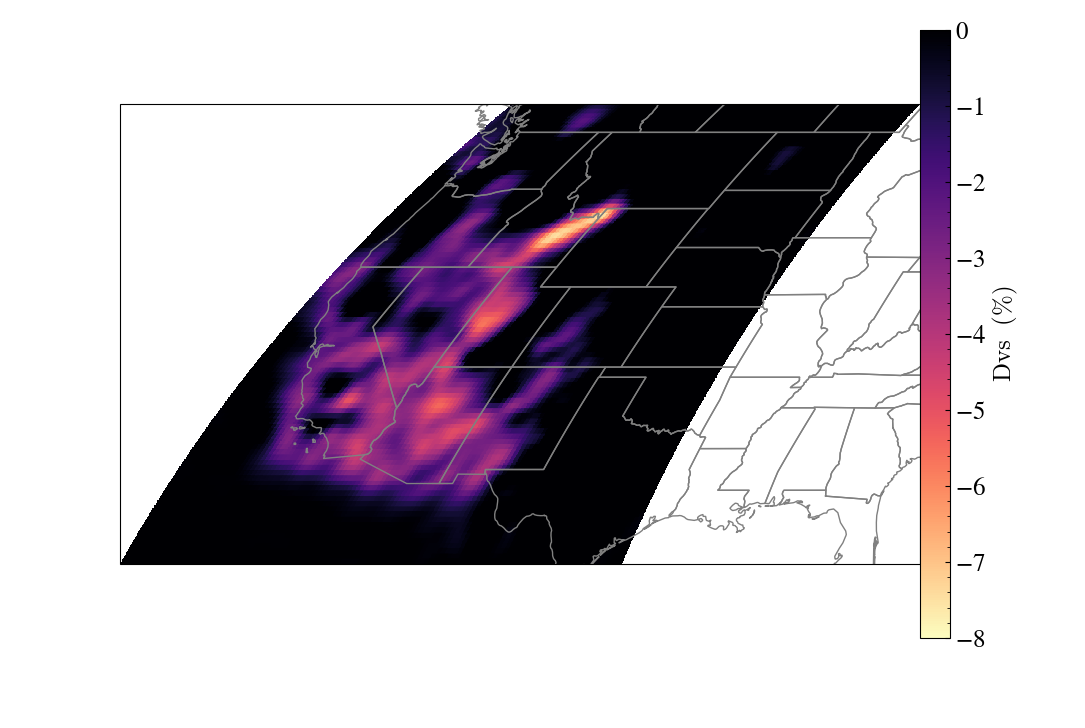

In [5]:
import yt_xarray
import yt
from cartopy.feature import NaturalEarthFeature

ds = yt_xarray.open_dataset("IRIS/wUS-SH-2010_percent.nc")
yt_ds = ds.yt.load_grid(use_callable=True)

c = yt_ds.domain_center.copy()
c[0] = 150.
slc = yt.SlicePlot(yt_ds, "depth", ("stream", "dvs"), center = c)
slc.set_log(("stream", "dvs"), False)
slc.set_cmap(("stream", "dvs"), "magma_r")
slc.set_zlim(("stream", "dvs"), -8, 0)
slc._setup_plots()

states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces')
slc[("stream", "dvs")].axes.add_feature(states, edgecolor='gray')
slc.show()

yt : [INFO     ] 2024-03-12 12:23:39,644 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-12 12:23:39,645 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-03-12 12:23:39,645 Parameters: domain_left_edge          = [-3271. -5573.  2533.]
yt : [INFO     ] 2024-03-12 12:23:39,646 Parameters: domain_right_edge         = [ -334. -2832.  4870.]
yt : [INFO     ] 2024-03-12 12:23:39,647 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-03-12 12:23:40,276 xlim = -5573.000000 -2832.000000
yt : [INFO     ] 2024-03-12 12:23:40,277 ylim = 2533.000000 4870.000000
yt : [INFO     ] 2024-03-12 12:23:40,279 xlim = -5573.000000 -2832.000000
yt : [INFO     ] 2024-03-12 12:23:40,279 ylim = 2533.000000 4870.000000
yt : [INFO     ] 2024-03-12 12:23:40,285 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800



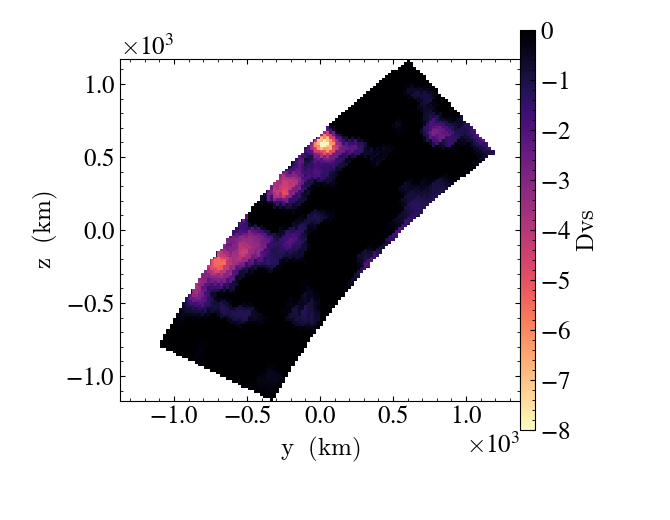

yt : [INFO     ] 2024-03-12 12:23:41,576 xlim = 2533.000000 4870.000000
yt : [INFO     ] 2024-03-12 12:23:41,577 ylim = -3271.000000 -334.000000
yt : [INFO     ] 2024-03-12 12:23:41,579 xlim = 2533.000000 4870.000000
yt : [INFO     ] 2024-03-12 12:23:41,579 ylim = -3271.000000 -334.000000
yt : [INFO     ] 2024-03-12 12:23:41,580 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800



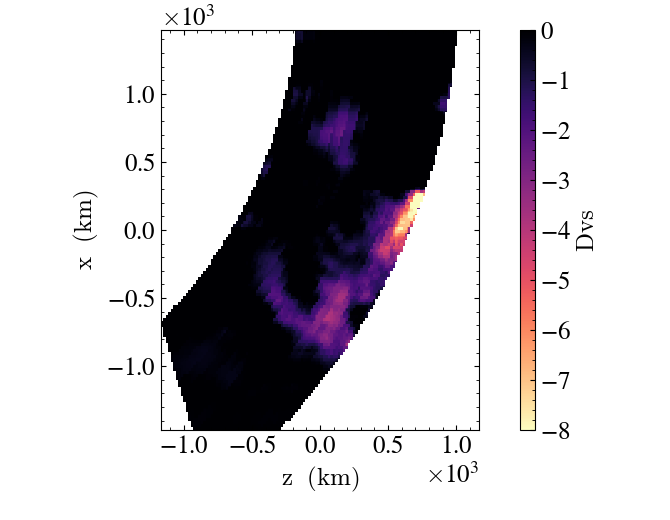

yt : [INFO     ] 2024-03-12 12:23:42,509 xlim = -3271.000000 -334.000000
yt : [INFO     ] 2024-03-12 12:23:42,509 ylim = -5573.000000 -2832.000000
yt : [INFO     ] 2024-03-12 12:23:42,511 xlim = -3271.000000 -334.000000
yt : [INFO     ] 2024-03-12 12:23:42,511 ylim = -5573.000000 -2832.000000
yt : [INFO     ] 2024-03-12 12:23:42,513 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800



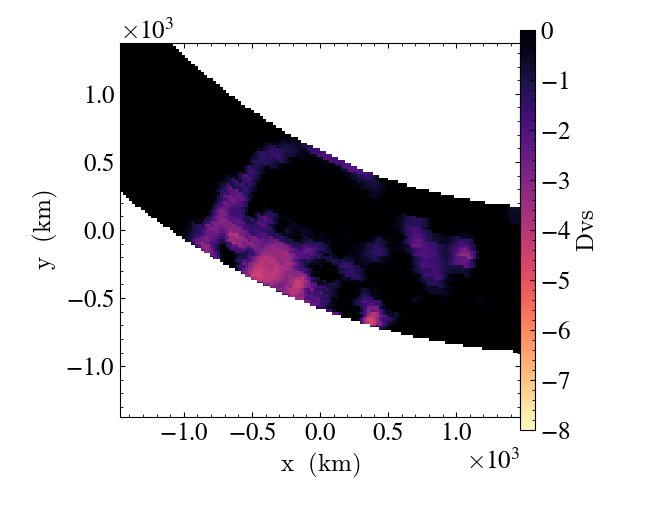

In [1]:
import xarray as xr
import yt_xarray
import yt
from yt_xarray import transformations

ds = yt_xarray.open_dataset("IRIS/wUS-SH-2010_percent.nc")
grid_resolution = (128, 128, 128)
ds_yt = transformations.build_interpolated_cartesian_ds(
    ds,
    [
        "dvs",
    ],
    "depth",
    grid_resolution = grid_resolution
)
for ax in ('x', 'y', 'z'):
    slc = yt.SlicePlot(ds_yt, ax, ('stream', 'dvs'), window_size=(4,4))
    slc.set_log(("stream", "dvs"), False)
    slc.set_cmap(("stream", "dvs"), "magma_r")
    slc.set_zlim(("stream", "dvs"), -8, 0)
    slc.show()

yt : [INFO     ] 2024-03-12 12:23:48,494 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-12 12:23:48,495 Parameters: domain_dimensions         = [80 80 80]
yt : [INFO     ] 2024-03-12 12:23:48,495 Parameters: domain_left_edge          = [-3271. -5573.  2533.]
yt : [INFO     ] 2024-03-12 12:23:48,496 Parameters: domain_right_edge         = [ -334. -2832.  4870.]
yt : [INFO     ] 2024-03-12 12:23:48,496 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-03-12 12:23:48,654 Field ('stream', 'slow_dvs') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2024-03-12 12:23:48,654 xlim = -5573.000000 -2832.000000
yt : [INFO     ] 2024-03-12 12:23:48,655 ylim = 2533.000000 4870.000000
yt : [INFO     ] 2024-03-12 12:23:48,657 xlim = -5573.000000 -2832.000000
yt : [INFO     ] 2024-03-12 12:23:48,657 ylim = 2533.000000 4870.000000
yt : [INFO     ] 2024-03-12 12:23:48,659 Making a fixed resolution buffer of (('st


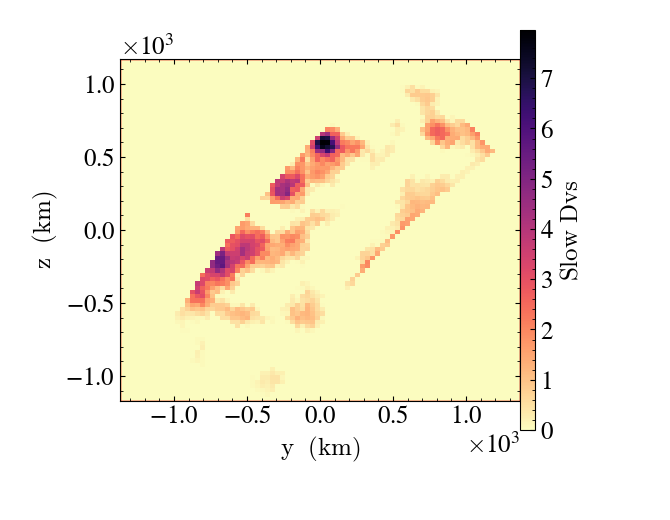

In [2]:
import numpy as np 

grid_resolution = (80, 80, 80)
ds_yt = transformations.build_interpolated_cartesian_ds(
    ds,
    [
        "dvs",
    ],
    "depth",
    grid_resolution = grid_resolution,     
)


def _slow_vels(field, data):
    # return negative velocities only, 0 all other elements
    dvs = data['dvs'].copy()
    dvs[np.isnan(dvs)] = 0.0
    dvs[dvs>0] = 0.0
    return np.abs(dvs)

ds_yt.add_field(
    name=("stream", "slow_dvs"),
    function=_slow_vels,
    sampling_type="local",
)

slc = yt.SlicePlot(ds_yt, 'x', ('stream', 'slow_dvs'), window_size=(4,4))
slc.set_log(("stream", "slow_dvs"), False)
slc.set_cmap(("stream", "slow_dvs"), "magma_r")

slc.annotate_grids(edgecolors=(1,0,0,1))
slc.show()

yt : [INFO     ] 2024-03-12 12:23:57,546 Rendering scene (Can take a while).
yt : [INFO     ] 2024-03-12 12:23:57,547 Creating volume


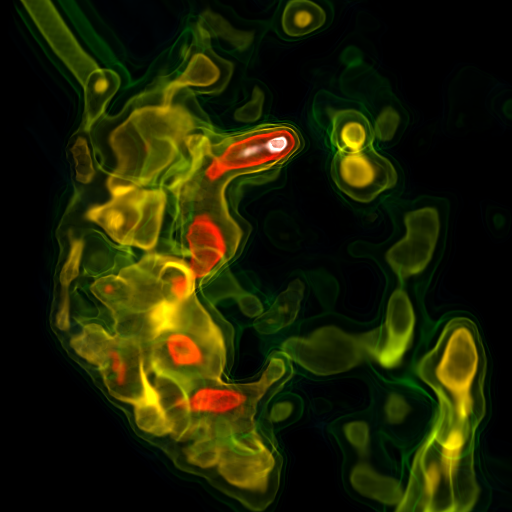

yt : [INFO     ] 2024-03-12 12:23:58,974 Found previously rendered image to save.
yt : [INFO     ] 2024-03-12 12:23:58,975 Saving rendered image to WUS_rendering.png


In [3]:
reg = ds_yt.region( ds_yt.domain_center, ds_yt.domain_left_edge, ds_yt.domain_right_edge)
reg

sc = yt.create_scene(reg, field=('stream', 'slow_dvs'))

cam = sc.add_camera(ds_yt)

source = sc[0]

# Set the bounds of the transfer function
source.tfh.set_bounds((0.1, 8))

# set that the transfer function should be evaluated in log space
source.tfh.set_log(True)

source.tfh.plot("transfer_function.png", profile_field=('stream', 'slow_dvs'))
cam.zoom(2)
cam.yaw(100*np.pi/180)
cam.roll(220*np.pi/180)
cam.rotate(30*np.pi/180)

sc.show(sigma_clip=5.)
sc.save('WUS_rendering.png', sigma_clip=5., render=False)
